In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

## Data Loading and Batching

In [2]:
# constant values
IMAGE_WIDTH = 254
IMAGE_HEIGHT = 254
BATCH_SIZE = 32
SEED = 123
CLASS_NAMES = ["Fire", "No_Fire"]
VALIDATION_SPLIT = 0.2

In [3]:
# import images for training
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='./Training',
    labels='inferred',
    color_mode='rgb',
    image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    class_names=CLASS_NAMES,
    validation_split=VALIDATION_SPLIT,
    subset="training",
    seed=SEED,
    batch_size=BATCH_SIZE
)

Found 39375 files belonging to 2 classes.
Using 31500 files for training.


In [4]:
# import images for validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='./Training',
    labels='inferred',
    color_mode='rgb',
    image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    class_names=CLASS_NAMES,
    validation_split=VALIDATION_SPLIT,
    subset="validation",
    seed=SEED,
    batch_size=BATCH_SIZE
)

Found 39375 files belonging to 2 classes.
Using 7875 files for validation.


In [19]:
# import images for hold-out test
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='./Test',
    labels='inferred',
    color_mode='rgb',
    image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    class_names=CLASS_NAMES,
    batch_size=BATCH_SIZE
)

Found 8617 files belonging to 2 classes.


## Performance Optimisation

In [5]:
norm_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [6]:
BUFFER_SIZE = 512
train_ds = train_ds.cache().prefetch(buffer_size=BUFFER_SIZE)
val_ds = val_ds.cache().prefetch(buffer_size=BUFFER_SIZE)

## Model Design

In [7]:
NUM_OUTPUT = 2
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

model = models.Sequential()
model.add(norm_layer)
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(NUM_OUTPUT))

## Model Compilation, Building and Fitting

In [9]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics='accuracy'
)

In [10]:
# model.build(train_ds)

In [11]:
# model.summary()

In [12]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5
985/985 [==============================] - 494s 501ms/step - loss: 0.1663 - accuracy: 0.8536 - val_loss: 0.0804 - val_accuracy: 0.9792
Epoch 2/5
985/985 [==============================] - 495s 502ms/step - loss: 0.0919 - accuracy: 0.7764 - val_loss: 0.0560 - val_accuracy: 0.9855
Epoch 3/5
985/985 [==============================] - 518s 526ms/step - loss: 0.0746 - accuracy: 0.6585 - val_loss: 0.0642 - val_accuracy: 0.9662
Epoch 4/5
985/985 [==============================] - 501s 509ms/step - loss: 0.2675 - accuracy: 0.7075 - val_loss: 0.6891 - val_accuracy: 0.6409
Epoch 5/5
985/985 [==============================] - 536s 544ms/step - loss: 0.6651 - accuracy: 0.6340 - val_loss: 0.6530 - val_accuracy: 0.6409


## Model Evaluation

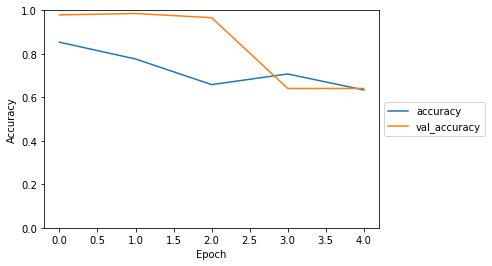

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 254, 254, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 252, 252, 4)       112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 4)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 8)       296       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 8)         584       
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0

In [20]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)

270/270 - 58s - loss: 0.6805 - accuracy: 0.5961


In [17]:
print("Testing accuracy is: ", test_acc)

Accuracy is:  0.6408888697624207
